### Intro til programmering i Python

Tema: **csv-filer**, **seklima.no**, **pandas**, **numpy**


Når du er ferdig med å installere jupyter notebook og satt det opp for bruk med Ekte Data kan du kjøre gjennom dette skriptet for å sjekke at alt er satt opp slik det skal. 

Dette skriptet inneholder forklaringer på en del av det som skjer, men ikke alt. Hovedpoenget med skriptet er å sjekke at ting fungerer, gi litt inspirasjon til hvordan man kan utforske et datasett, og sette bruken av programmering i naturfag litt i perspektiv. 

Vi kommer tilbake til detaljene i januar-samlingen. Da starter vi på begynnelsen med å introdusere programmering i Python, bruk av variabler, og indeksering. 

For å kjøre gjennom kode i jupyter notebook er det er par ting som er greit å vite:
- trykk `Shift+Enter` for å kjøre en celle og hoppe ned til neste celle
- trykk `Ctrl+Enter` for å kjøre en celle og bli værende i samme celle
- alt med `#` foran blir ignorert i koden
- når du skriver f.eks. `x=4` lager du variabelen `x`. Hvis du vil se innholdet i `x` kan du skrive `x` på bunnen i en celle du kjører, eller `print(x)` hvor som helst i cellen. Hvis du kun skriver `x=4` og kjører cellen er variabelen lagret selv om du ikke ser et output. 
- `string` er navnet på tekst
- `float` og `integer` er navnet på desimaltall og heltall. 
- indekseingen starter på 0 og angis med brakkeparantes. Har man f.eks. `x=[3,4,5,6]` vil `x[0]` være lik 3. Men dette kommer vi tilbake til. 
- for å lage en kodecelle om til en tekstboks som dette trykk `Esc+m`, m for "markdown".
- for å lage en ny kodecelle trykk `Esc+a` for kodecelle over den du står i, eller `Esc+b` for kodecelle under den du står i. 

Denne koden går gjennom flere steg
- laster inn en fil fra seklima.no på csv-format - samme format som dataene dere henter inne selv. 
- lager enkle figurer som presenterer dataene
- beregner akkumulert nedbør og presenterer dette i en ny figur
- vurderer om beregningen virker riktig
- lager figurer som viser flere variabler sammen for å se om det kan være en sammenheng mellom dem.
- vurderer sammenhengene vi ser. 

-------------

#### Last inn pakkene du trenger. 
Disse tre er alle veldig standard. 
- `pandas` er veldig god på noen typer databinnlesing, det er det vi bruker denne pakken til her, men den er også ofte nyttig f.eks. for å interpolere manglende verdier. 
- `matplotlib.pyplot` er (sannsynligvis) det aller mest brukte plotte-biblioteket. Med denne pakken kan du lage alt av linjeplot, histogram, scatterplot, kontur-plot, det meste du kan tenke deg. 
- `Numpy` er for "alt" av matematikk utover helt standard +-\*. Finne min og max, gjennomsnitt den slags, men kanskje aller viktigst vektor- og matriseoperasjoner.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Dette er stien til filen du vil laste inn. Bytt den ut med stien til der du har lastet ned Ekte Data mappen fra GitHub. Det er også mulig å koble denne stien direkte opp til GitHub repositoriet, det gjør vi seinere. 

In [4]:
sti='W:/Work/Documents/EkteData/EkteData'
fil='/sol_nedbør_temp.csv'


#### Bruk pandas til å lese csv-filen. 
- `sep=';'` beskriver hva som deler kolonnene i filen. Hvis du åpner filen i f.eks. notepad ser du at dette er semikolon i vårt tilfelle, men det er ofte tab, komma (default), eller kolon. 
- Med `index_col` bestemmer du hvilken kolonne du vil sette til venstre og bruke som index. 
- `decimal=','` må være med fordi verdiene i denne csv-filen er lagret med komma som desimaltegn istedet for punktum. For at verdien skal tolkes som ett tall og ikke to må komma endres til punktum. 
- `parse_dates=['Tid(norsk normaltid)']` konverterer innholdet i denne kolonnen til dato-format.
- `dayfirst=True` sørger for at datoen tolkes riktig. Uten denne tolkes det første tallet i datoen som måned.
- `na_values='-'`: Hvis du åpner dette datasettet i notepas ser du at dette datasettet setter manglende verdier av moddeltemperatur til `-`. Dette greier ikke `decimal=','` å tolke som et tall, og derfor tolkes hele denne kolonnen som tekst (string). I stedet for at den første temperaturverdien blir `-4.3` som er et tall, blir denne verdien tolket som `'-4,3'` som er en tekst-string. Men, når man definerer `na_values='-'` forteller man koden at `'-'` betyr at en verdi mangler. Koden setter da alle instanser av `'-'` til `NaN` som står for Not a Number. 

In [5]:
df = pd.read_csv(
    sti+fil, sep=';', decimal=',', parse_dates=['Tid(norsk normaltid)'],
    dayfirst=True, na_values='-'
)

df er nå en "Pandas DataFrame". Dette er en fin og oversiktlig måte å få oversikten over et datasett på. 

In [6]:
df

,Navn,Stasjon,Tid(norsk normaltid),Solskinnstid (døgn),Nedbør (døgn),Middeltemperatur (døgn)
0,Flesland,SN50500,2021-01-06,3.3,0.0,-4.3
1,Flesland,SN50500,2021-01-07,2.8,0.0,-1.4
2,Flesland,SN50500,2021-01-08,3.2,0.0,-2.5
3,Flesland,SN50500,2021-01-09,0.0,0.0,0.7
4,Flesland,SN50500,2021-01-10,0.0,12.1,0.4
...,...,...,...,...,...,...
362,Flesland,SN50500,2022-01-03,0.0,2.6,4.5
363,Flesland,SN50500,2022-01-04,0.0,12.8,3.2
364,Flesland,SN50500,2022-01-05,2.5,8.5,1.8
365,Flesland,SN50500,2022-01-06,0.0,0.0,NaN


De to siste linjene i denne DataFram-en inneholder ikke gyldige verdier. Vi redefinerer defor `df` slik at de to siste linjene utelukkes. I panda DataFrames angir man navnet til kolonnen først, og så hvilke rader man vil se på. Dette er litt forvirrende siden standard indeksering i pythonbruker "row" så "column". Med pandas DataFrame betyr altså `df[:][:-1]` "alle kolonner" (`[:]`), og "alle rader utenom de to siste" (`[:-2]`). Indeksering er forvirrende å holde styr på i starten, men vi kommer tilbake til dette i den første samlingen med eksempler, øving, og reglene som gjelder. 

In [7]:
df=df[:][:-2]
df

,Navn,Stasjon,Tid(norsk normaltid),Solskinnstid (døgn),Nedbør (døgn),Middeltemperatur (døgn)
0,Flesland,SN50500,2021-01-06,3.3,0.0,-4.3
1,Flesland,SN50500,2021-01-07,2.8,0.0,-1.4
2,Flesland,SN50500,2021-01-08,3.2,0.0,-2.5
3,Flesland,SN50500,2021-01-09,0.0,0.0,0.7
4,Flesland,SN50500,2021-01-10,0.0,12.1,0.4
...,...,...,...,...,...,...
360,Flesland,SN50500,2022-01-01,0.0,1.7,4.6
361,Flesland,SN50500,2022-01-02,0.0,4.9,7.5
362,Flesland,SN50500,2022-01-03,0.0,2.6,4.5
363,Flesland,SN50500,2022-01-04,0.0,12.8,3.2


#### Pandas DataFrame til Numpy Array

Vi vil konvertere Pandas DataFrame til et numpy array fordi plottebiblioteket matplotlib behandler f.eks. manglende verdier bedre. Denne konverteringen er også praktisk hvis du f.eks. skal sammenligne et datasett som dette med et du har lest inn som numpy array. Man trenger i blant å konvertere mellom disse to formatene. 

Hvis df er en DataFrame slik som den vi har konverterer dette til numpy array: df.to_numpy. 

For å konvertere motsatt vei kan man bruke pd.DataFrame(array) hvis array er et numpy array. 

In [8]:
data=df.to_numpy()

In [9]:
print(data)
print(' ')
print('shape of array "data": ', data.shape)

[['Flesland' 'SN50500' Timestamp('2021-01-06 00:00:00') 3.3 0.0 -4.3]
 ['Flesland' 'SN50500' Timestamp('2021-01-07 00:00:00') 2.8 0.0 -1.4]
 ['Flesland' 'SN50500' Timestamp('2021-01-08 00:00:00') 3.2 0.0 -2.5]
 ...
 ['Flesland' 'SN50500' Timestamp('2022-01-03 00:00:00') 0.0 2.6 4.5]
 ['Flesland' 'SN50500' Timestamp('2022-01-04 00:00:00') 0.0 12.8 3.2]
 ['Flesland' 'SN50500' Timestamp('2022-01-05 00:00:00') 2.5 8.5 1.8]]
 
shape of array "data":  (365, 6)


#### Lag nye variabler

Akkurat som i DataFram-en er det 363 rader (en verdi per dag) og 6 kolonner (en for hver variabel/metadata). Når man vil se på en og en variabel av gangen er det ofte ryddig å lagre hver variabel fra matrisen til en *egen* variabel. Dette er det vi gjør i cellen under. 

`tid` er i kolonne nr 3. Siden Python starter indekseringen på 0 blir indeksen til kolonne 2 `3`. Derfor kan vi skrive `tid=data[:,2]` - alle radene tas med `:`, men kun kolonnen med indeks `2` tas med. Tilsvarende for sol, nedbør og temp. 

In [10]:
tid=data[:,2]
sol=data[:,3]
nedbør=data[:,4]
temp=data[:,5]

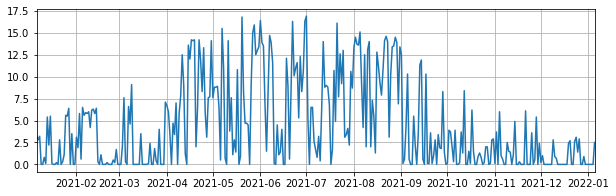

In [11]:
plt.figure(figsize=(10,3))
plt.plot(tid,sol)
plt.grid()
plt.xlim(tid[0], tid[-1])
plt.show()

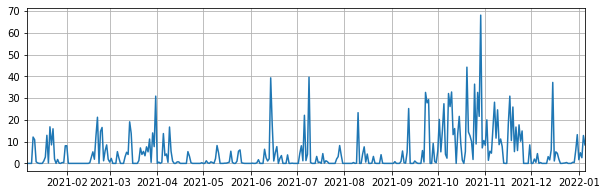

In [12]:
plt.figure(figsize=(10,3))
plt.plot(tid,nedbør)
plt.grid()
plt.xlim(tid[0], tid[-1])
plt.show()

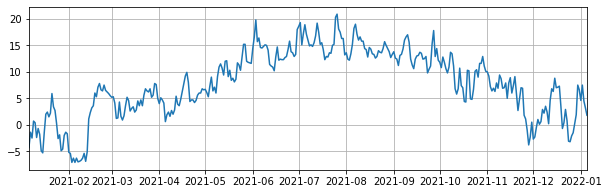

In [13]:
plt.figure(figsize=(10,3))
plt.plot(tid,temp)
plt.grid()
plt.xlim(tid[0], tid[-1])
plt.show()

#### Prøv selv

Nå som du har kjørt gjennom koden en gang kan du prøve å fjerne `na_values='-'` i celle nr 3 der du leser inn datasettet med pd.csv_read() og kjøre gjennom på nytt og se hva som skjer. Når du plotter den siste figuren blir det ganske tydelig at noe er galt. Det var dette som gjorde at jeg selv oppdaget at noe var galt og skjønte at jeg måtte oppdatere noe i innlesningen av datasettet. Slik prøving og feiling skjer hele tiden i programmering. 

Et triks når du skal fjerne `na_values='='` er å *kommentere ut* denne biten av koden. Det gjør man med `#`. I kodeceller blir alt med `#` foran ignorert. Man kan altså skrive:

In [ ]:
df = pd.read_csv(
    sti+fil, sep=';', decimal=',', parse_dates=['Tid(norsk normaltid)'],
    dayfirst=True#, na_values='-'
)

All turkis tekst i italic blir altså ignorert. 

### Beregninger med et datasett

Siden du endret innlesingen av datasettet slik at det ikke funker lengre må du endre det tilbake og kjøre gjennom på nytt før du fortsetter med seksjonen under. 

Nå har vi plottet dataene direkte, men vi kan også gjøre beregninger. Nedbør presenteres for eksempel ofte som akumulert nedbør, altså totalt hvor mye nedbør man har hatt så langt i år. 

Det kan man beregne på denne (litt rotete) måten:

In [14]:
akumulert_nedbør=nedbør[0]*np.ones(len(nedbør))
for i in range(len(nedbør)-1):
    akumulert_nedbør[i+1]=akumulert_nedbør[i]+nedbør[i+1]

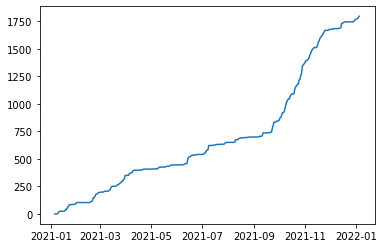

In [19]:
plt.plot(tid, akumulert_nedbør)
plt.show()

Eller denne (også litt rotete) måten:

In [16]:
akumulert_nedbør=np.array(([nedbør[0]]))
for i in range(len(nedbør)-1):
    akumulert_nedbør=np.append(akumulert_nedbør,akumulert_nedbør[i]+nedbør[i+1])

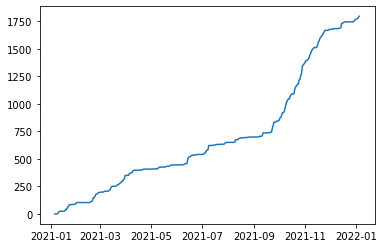

In [20]:
plt.plot(tid, akumulert_nedbør)
plt.show()

Eller slik som dette, med en innebygd funksjon fra `numpy`:

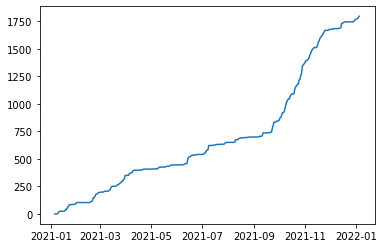

In [21]:
akumulert_nedbør=np.cumsum(nedbør) # Cumulative sum
plt.plot(tid, akumulert_nedbør)
plt.show()

Det er alltid flere muligheter for å komme frem til samme svar. Det kan være både befriene og frustrerende at det ikke alltid finnes en fasit. Når det kommer til innebygde funksjoner, slik som `np.cumsum` i eksempelet over er det en god regel å bruke disse. Det er lett å gjøre småfeil selv, men når man bruker funksjonene til disse store bibliotekene kan man være nokså sikre på at eventuelle feil er luket ut fordi det er så utrolig mange som bruker disse funksjonene, så om det var en feil ville nok noen funnet den allerede, gitt beskjed, og fått det fikset (dette er det som gjør open source så bra!). Men nettopp fordi disse funksjonene stort sett er til å stole på, er det god trening å øve seg på å gjøre slike beregninger selv - man har fasit å sammenligne med. 

Det er imidlertid alltid bra å være litt skeptisk. Hvordan stemmer tidsserien av akumulert nedbør overens med figuren over daglig nedbør? Ser det ut til at beregningen er rett?

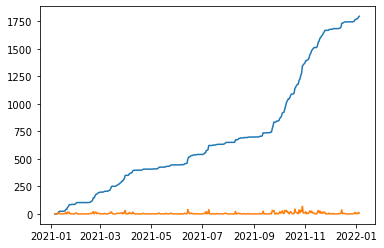

In [22]:
plt.plot(tid, akumulert_nedbør)
plt.plot(tid, nedbør)
plt.show()

Det er veldig vanskelig å se når støreelsesordenen til nedbør og akumulert nedbør er så forskjellig. Vi prøver på nytt.

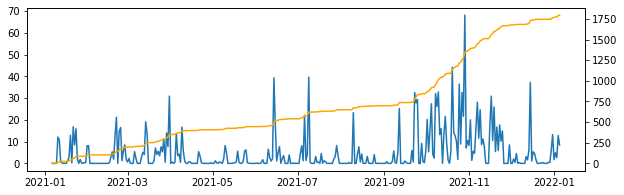

In [23]:
fig, ax1 = plt.subplots(figsize=(10,3))
ax2 = ax1.twinx()

ax1.plot(tid, nedbør)
ax2.plot(tid, akumulert_nedbør, color='orange')
plt.show()

Nå har vi lagt til en y-akse til høyre. Vi kommer tilbake til denne type figur-tekniske ting seinere. 

Dette ser ganske bra ut: når det regner lite er grafen over akumulert nedbør nesten horisontal. Når det regner mye stiger akumulert nedbør mye. Dette tyder på at beregningen vår er riktig. 

### Sammenlign ulike datasett

Det er også ofte interessant å sammenligne ulike variabler. Sol og nedbør er for eksempel sannsynligvis relatert til hverandre: Når det er mye sol er det sannsynlig at det ikke regner så mye. Vi kan sammenligne grafene for å gjøre en kjapp sjekk:

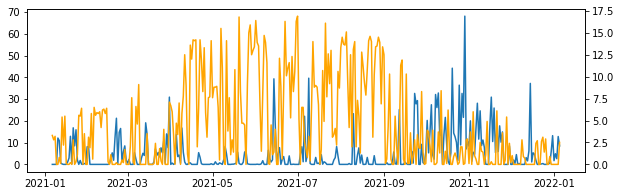

In [86]:
fig, ax1 = plt.subplots(figsize=(10,3))
ax2 = ax1.twinx()

ax1.plot(tid, nedbør)
ax2.plot(tid, sol, color='orange')
plt.show()

Ved første øyekast ser dette ut omtrent som forventet, spesielt frem til ca september. Her øker variabiliteten og det blir vanskeligere å se et system mellom de blå og gule linjene. Å zoome in kan helpe:

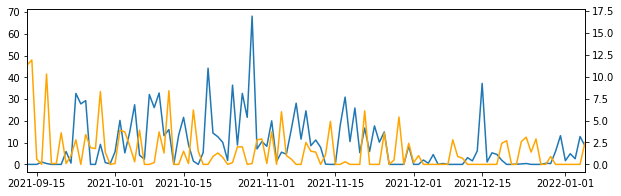

In [92]:
fig, ax1 = plt.subplots(figsize=(10,3))
ax2 = ax1.twinx()

ax1.plot(tid, nedbør)
ax2.plot(tid, sol, color='orange')
plt.xlim(tid[250], tid[-1])
plt.show()

Det er fremdeles ikke et helt entydig mønster mellom variasjon i nedbør og soltimer i denne biten av datasettet. Det tyder for eksempel på at det er flere ting som påvirker antall soltimer enn om det er regnskyer tilstede. Og dette stemmer jo med hva kan observerer her i Bergen: Man kan ha sol og regn om hverandre i løpet av en og samme dag, og enda mer typisk: byen er ofte dekket av et grått skydekke uten at det regner noe særlig. I tilleg er jo antall sotimer på en dag avhengig av sesongen. Å lage en hypotese om at det generelt regner lite når antall soltimer er over 10 timer gir for eksempel ikke mening om vinteren. Det er med andre ord viktig å ikke glemme de naturlige prosessene som ligger bak tallverdiene i datasettet man ser på!

### Undesøk en hypotese

Tilsvarende kan vi sammenligne nedbør og temperatur. Fra naturfag vet vi at varm luft kan holde på mer fuktighet, så vi kan lage oss en hypotese om at det regner mer når det er varmt: Det er varmt, så luften holder på mye fuktighet, luften treffer fjellene i Bergen og blir presset opp dit der er kaldere og det begynner å regne. Støtter datasettet vårt denne hypotesen?

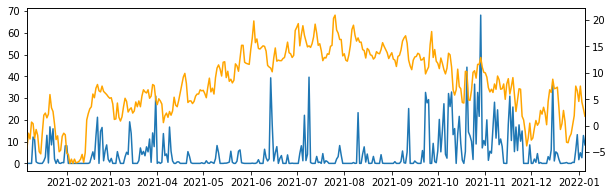

In [95]:
fig, ax1 = plt.subplots(figsize=(10,3))
ax2 = ax1.twinx()

ax1.plot(tid, nedbør)
ax2.plot(tid, temp, color='orange')
plt.xlim(tid[0], tid[-1])
plt.show()

Ved første øyekast er svaret kanskje "nei: det regner ikke mer når det er varmt". Men ser man nærmere på dette er svaret litt mer innviklet. I starten av perioden ser det faktisk ut som om at hypotesen kan ha noe for seg. Dette gjelder også til en viss grad slutten av datasettet. I februar er det for eksempel en periode med veldig lite regn, og som også var en av de kaldeste periodene. Husk tilbake til solinnstrålingen: Denne perioden hadde også mye sol (for årstiden). Dette er vintervær i kjenner til, kaldt, tørt, og sol.

I juni er det imidlertid helt motsatt: Det var varmt og det regnet nesten ingenting. Dette er sommervær vi kjenner til, varmt, tørt, og sol. 

Vi plotter alle tre tidsseriene sammen.

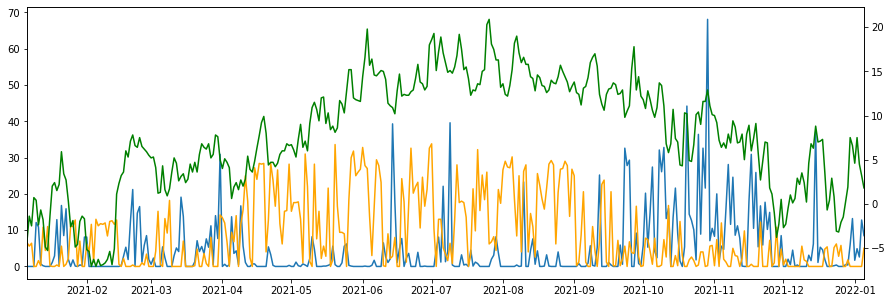

In [113]:
fig, ax1 = plt.subplots(figsize=(15,5))
ax2 = ax1.twinx()

ax1.plot(tid, nedbør)
ax2.plot(tid, temp, color='green')
ax1.plot(tid, sol*2, color='orange')
plt.xlim(tid[0], tid[-1])
#ax1.set_ylim(-20,70)
#ax2.set_ylim(-10,35)
plt.show()

Det virker som om at sammenhengen mellom nedbør og temperatur er sesongavhengig. Vi må modifisere hypotesen vår. En ny hypotese kan være: Om sommeren regner det mer når det er kaldt, mens om vinteren regner det mer når det er varmt. Men er det egentlig slik at det regner mer når det er kaldt om sommeren, eller blir det kaldt når det regner..? 

Å analysere datasett som dette er nyttig for å undersøke slike spørsmål, og det er helt nødvendig å sette dataanalysen som vi gjør Python i sammenheng med teorien vi har fra naturfag. Hvis ikke er det nokså umulig å lage gode og nyttige spørsmål som man må ha på plass før man setter i gang med programmeringen. Å undersøke datasett på denne måten kan imidlertid også sette oss på sporet av interessante spørsmål vi ikke ville kommet på dersom vi ikke kunne visualisere og undersøke dataene slik som vi kan med python. 